# final visualisations for paper

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# tsne bedrock

In [2]:
save_plots = True

In [3]:
filepath = 'final_figures/bedrock_tsne.eps'
tsne_data_with_colour = pd.read_csv('output_datasets/pre_model_datasets/tsne_data_with_color_bedrock.csv')

In [5]:
my_pallete = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#000000']

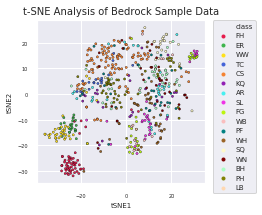

In [6]:

sns.set(rc={'figure.figsize':(3,3)})
sns.set_palette(sns.color_palette(my_pallete, 19))

plot_on_x = 'tsne1'
plot_on_y = 'tsne2'

plot = sns.scatterplot(data = tsne_data_with_colour, linewidth = 0.3, edgecolor = 'black', s= 5, x = plot_on_x, y = plot_on_y, hue='class',
                #palette=sns.color_palette("colorblind", tsne_data_with_colour['class'].nunique())
                      )

plt.title('t-SNE Analysis of Bedrock Sample Data', fontsize = 10)

plt.yticks(fontsize = 5)
plt.xticks(fontsize = 5)

plot.set_xlabel('tSNE1',fontsize=7)
plot.set_ylabel('tSNE2',fontsize=7)


plt.legend(fontsize=7, markerscale=0.5, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(fname=filepath, dpi = 2000, pad_inches = 0.5, bbox_extra_artists=(plot,), bbox_inches='tight')
    


# tsne superficial

In [38]:
filepath = 'final_figures/superficial_tsne.eps'


tsne_data_with_colour = pd.read_csv('output_datasets/pre_model_datasets/tsne_data_with_color_superficial.csv')

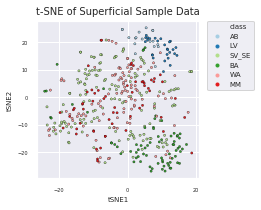

In [39]:

sns.set(rc={'figure.figsize':(2.9,2.9)})


plot_on_x = 'tsne1'
plot_on_y = 'tsne2'

plot = sns.scatterplot(data = tsne_data_with_colour, linewidth = 0.3, edgecolor = 'black', s= 5, x = plot_on_x, y = plot_on_y, hue='class',
                palette=sns.color_palette("Paired", tsne_data_with_colour['class'].nunique()))

plt.title('t-SNE of Superficial Sample Data', fontsize = 10)

plt.yticks(fontsize = 5)
plt.xticks(fontsize = 5)


plot.set_xlabel('tSNE1',fontsize=7)
plot.set_ylabel('tSNE2',fontsize=7)

plt.legend(fontsize=7, markerscale=0.5, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(fname=filepath, dpi = 2000, pad_inches = 0.5, bbox_extra_artists=(plot,), bbox_inches='tight')
    


# tsne outliers

In [3]:
filepath = 'final_figures/outlier_tsne.eps'

tsne_data_with_colour = pd.read_csv('output_datasets/pre_model_datasets/tsne_outlier_data.csv')

In [4]:
tsne_data_with_colour.columns

Index(['Unnamed: 0', 'tsne1', 'tsne2', 'inlierLabel'], dtype='object')

In [5]:
def outlier_label(row):
    if row['inlierLabel'] == -1:
        return('outlier')
    elif row['inlierLabel'] == 1:
        return('inlier')

In [6]:
tsne_data_with_colour['class'] = tsne_data_with_colour.apply(outlier_label, axis = 1)

In [7]:
tsne_data_with_colour.head()

Unnamed: 0      tsne1      tsne2  inlierLabel    class
0           0  -8.287100  -3.327619            1   inlier
1           1  -8.637551  -3.894378           -1  outlier
2           2  -9.214499  -4.432769           -1  outlier
3           3 -25.218588 -10.045152            1   inlier
4           4 -27.045334  -7.151527            1   inlier

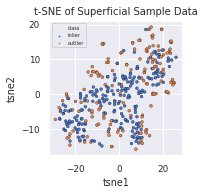

In [8]:
sns.set(rc={'figure.figsize':(2.8,2.8)})

plot_on_x = 'tsne1'
plot_on_y = 'tsne2'

sns.set(font_scale=0.8)
plot = sns.scatterplot(data = tsne_data_with_colour, s= 8, x = plot_on_x, y = plot_on_y, hue='class', linewidth = 0.3, edgecolor = 'black',
                palette=sns.color_palette("muted", tsne_data_with_colour['class'].nunique())
               )
plt.title('t-SNE of Superficial Sample Data', fontsize = 10)
plt.legend(fontsize=5, markerscale=0.16)

plt.tight_layout()


if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(fname=filepath, dpi = 2000, pad_inches = 0.5)

# RFE

In [12]:
filepath = 'final_figures/RFE.eps'

RFCV_df = pd.read_csv('output_datasets/pre_model_datasets/RFCV_DF.csv')

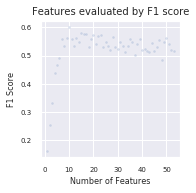

In [13]:
sns.set(rc={'figure.figsize':(2.7,2.7)})
sns.set(font_scale=0.6)

plot = sns.scatterplot(data = RFCV_df, x = 'Number of Features', y = 'F1 Score', s = 8, alpha = 0.2)

plt.title('Features evaluated by F1 score', fontsize = 10)
plot.set_xlabel('Number of Features',fontsize=8)
plot.set_ylabel('F1 Score',fontsize=8)

plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.tight_layout()

if save_plots:
    fig = plot.get_figure()
    fig.savefig(filepath)

# learning curve

In [14]:


filepath = 'final_figures/LC.eps'

rfc_lc = pd.read_csv('output_datasets/pre_model_datasets/rfc_lc.csv')

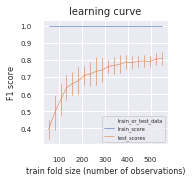

In [15]:
sns.set(rc={'figure.figsize':(2.7,2.7)})
sns.set(rc={"lines.linewidth": 0.6})

plot = sns.lineplot(x = 'train_sizes', y = 'k_fold_stratified_scores', hue = 'train_or_test_data', ci = 'sd', err_style='bars', data = rfc_lc, markers = True)




plot.set_ylabel("F1 score",fontsize=8)
plot.set_xlabel("train fold size (number of observations)",fontsize=8)
plot.tick_params(labelsize=5, length=8, width=2 )



plt.title('learning curve', fontsize = 10)

plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)

plt.tight_layout()

plt.legend(fontsize = 5, loc = 4)

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(filepath)

# knn boxplot

In [16]:
filepath = 'final_figures/macro_f1_knn.eps'
data = pd.read_table('output_datasets/knn_datasets/macro_f1_scores', header = None)

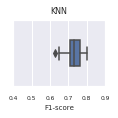

In [17]:
sns.set(rc={'figure.figsize':(1.8,1.8)})

plot = sns.boxplot(data, width = 0.4)
plot.set_title('KNN', fontdict={'fontsize': 8})
plot.set_xlabel("F1-score", fontdict={'fontsize': 7})
plot.tick_params(labelsize=6, length=6, width=2)

plot.set_xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.tight_layout()
if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(filepath)

# svm boxplot

In [18]:
filepath = 'final_figures/macro_f1_svm.eps'
data = pd.read_table('output_datasets/svm_datasets/macro_f1_scores', header = None)

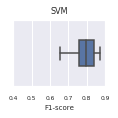

In [19]:
sns.set(rc={'figure.figsize':(1.8,1.8)})

plot = sns.boxplot(data, width = 0.4)
plot.set_title('SVM', fontdict={'fontsize': 8})
plot.set_xlabel("F1-score", fontdict={'fontsize': 7})
plot.tick_params(labelsize=6, length=6, width=2)

plot.set_xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.tight_layout()
if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(filepath)

# rfc boxplot

In [20]:
filepath = 'final_figures/macro_f1_rfc.eps'
data = pd.read_table('output_datasets/rfc_datasets/macro_f1_scores', header = None)

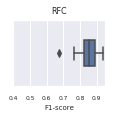

In [21]:
sns.set(rc={'figure.figsize':(1.8,1.8)})

plot = sns.boxplot(data, width = 0.4)
plot.set_title('RFC', fontdict={'fontsize': 8})
plot.set_xlabel("F1-score", fontdict={'fontsize': 7})
plot.tick_params(labelsize=6, length=6, width=2)

plot.set_xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.tight_layout()
if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(filepath)

# knn class F1 scores

In [22]:
filepath = 'final_figures/site_specific_f1_scores_knn.eps'
f1_df_final = pd.read_csv('output_datasets/knn_datasets/cross_validation_results.csv')

In [23]:
f1_df_final.set_index('class', inplace=True)

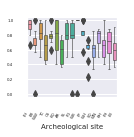

In [24]:
sns.set(rc={'figure.figsize':(2,2)})
sns.set( rc={"lines.linewidth": 0.6})
plot = sns.boxplot(data = f1_df_final.T, width = 0.6)
#plot.set_title('F1 scores for each site (KNN)', fontdict={'fontsize': 8})

#plot.set_ylabel('F1 score', fontdict={'fontsize': 7})
plot.set_xlabel("Archeological site", fontdict={'fontsize': 7})
plot.tick_params(labelsize=2.8, length=10, width=2 )
plt.tight_layout()
plot.set_yticklabels(labels = plot.get_yticklabels(), fontsize = 4)
plot.set_xticklabels(labels = plot.get_xticklabels(), rotation=60, fontsize = 4, ha = 'right')

if save_plots:
    fig = plot.get_figure()
    fig.savefig(filepath)

# svm class F1 scores

In [25]:
filepath = 'final_figures/site_specific_f1_scores_svm.eps'
f1_df_final = pd.read_csv('output_datasets/svm_datasets/cross_validation_results.csv')

In [26]:
f1_df_final.set_index('class', inplace=True)

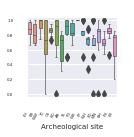

In [27]:
sns.set(rc={'figure.figsize':(2,2)})
sns.set( rc={"lines.linewidth": 0.6})
plot = sns.boxplot(data = f1_df_final.T, width = 0.6)
#plot.set_title('F1 scores for each site (KNN)', fontdict={'fontsize': 8})

#plot.set_ylabel('F1 score', fontdict={'fontsize': 7})
plot.set_xlabel("Archeological site", fontdict={'fontsize': 7})
plot.tick_params(labelsize=2.8, length=10, width=2 )
plt.tight_layout()
plot.set_yticklabels(labels = plot.get_yticklabels(), fontsize = 4)
plot.set_xticklabels(labels = plot.get_xticklabels(), rotation=60, fontsize = 4, ha = 'right')

if save_plots:
    fig = plot.get_figure()
    fig.savefig(filepath)

# RFC class F1 scores

In [28]:
filepath = 'final_figures/site_specific_f1_scores_rfc.eps'
f1_df_final = pd.read_csv('output_datasets/rfc_datasets/cross_validation_results.csv')

In [29]:
f1_df_final.set_index('class', inplace=True)

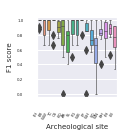

In [30]:
sns.set(rc={'figure.figsize':(2,2)})
sns.set( rc={"lines.linewidth": 0.6})
plot = sns.boxplot(data = f1_df_final.T, width = 0.6)
#plot.set_title('F1 scores for each site (KNN)', fontdict={'fontsize': 8})

plot.set_ylabel('F1 score', fontdict={'fontsize': 7})
plot.set_xlabel("Archeological site", fontdict={'fontsize': 7})
plot.tick_params(labelsize=2.8, length=10, width=2 )
plt.tight_layout()
plot.set_yticklabels(labels = plot.get_yticklabels(), fontsize = 4)
plot.set_xticklabels(labels = plot.get_xticklabels(), rotation=60, fontsize = 4, ha = 'right')

if save_plots:
    fig = plot.get_figure()
    fig.savefig(filepath)

# knn f1 vs sample size

In [31]:
forPlot = pd.read_csv('output_datasets/knn_datasets/score_vs_sample_number.csv')
filepath = 'final_figures/f1vssamplesizeknn.eps'


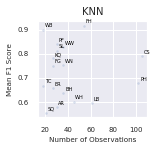

In [32]:

    
    
sns.set(rc={'figure.figsize':(2.3,2.1)})
sns.set(font_scale=0.6)

plot = sns.scatterplot(x ='Number of Observations', y = 'Mean F1 Score', markers='class', data = forPlot, s = 8, alpha = 0.2)

plt.title("KNN", fontsize = 10)


plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.tight_layout()

for line in range(0, forPlot.shape[0]):    
    plot.text((int(forPlot['Number of Observations'].iloc[line]) + 1.5), (float(forPlot['Mean F1 Score'].iloc[line])+0.01), forPlot['class'].iloc[line], horizontalalignment='left', size=5, color='black', weight='regular')

if save_plots:
    fig = plot.get_figure()
    fig.savefig(filepath)

# svm f1 vs sample size

In [33]:
forPlot = pd.read_csv('output_datasets/svm_datasets//score_vs_sample_number.csv')
filepath = 'final_figures/f1vssamplesize_svm.eps'


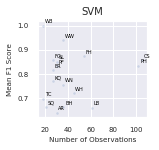

In [34]:

    
    
sns.set(rc={'figure.figsize':(2.3,2.1)})
sns.set(font_scale=0.6)

plot = sns.scatterplot(x ='Number of Observations', y = 'Mean F1 Score', markers='class', data = forPlot, s = 8, alpha = 0.2)

plt.title("SVM", fontsize = 10)


plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.tight_layout()

for line in range(0, forPlot.shape[0]):    
    plot.text((int(forPlot['Number of Observations'].iloc[line]) + 1.5), (float(forPlot['Mean F1 Score'].iloc[line])+0.01), forPlot['class'].iloc[line], horizontalalignment='left', size=5, color='black', weight='regular')

if save_plots:
    fig = plot.get_figure()
    fig.savefig(filepath)

# rfc f1 vs sample size

In [35]:
forPlot = pd.read_csv('output_datasets/rfc_datasets/score_vs_sample_number.csv')
filepath = 'final_figures/f1vssamplesizerfc.eps'


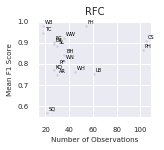

In [36]:

    
    
sns.set(rc={'figure.figsize':(2.3,2.1)})
sns.set(font_scale=0.6)

plot = sns.scatterplot(x ='Number of Observations', y = 'Mean F1 Score', data = forPlot, s = 8, legend = None,alpha = 0.2)

plt.title("RFC", fontsize = 10)


plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.tight_layout()

for line in range(0, forPlot.shape[0]):    
    plot.text((int(forPlot['Number of Observations'].iloc[line]) + 1.5), (float(forPlot['Mean F1 Score'].iloc[line])+0.01), forPlot['class'].iloc[line], horizontalalignment='left', size=5, color='black', weight='regular')


if save_plots:
    fig = plot.get_figure()
    fig.savefig(filepath)